In [3]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/yasser/classes/DL26/final_Project")

import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload    

from src.utils.config import CONFIG

from src.utils.data_loader import create_loaders
from notebooks.yasser.custom_model import Custom_model     
from src.utils.train_model_sr import train_model_sr
import json


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device : {device}")

# CONFIG FROM YAML 
data_root      = CONFIG["paths"]["output_root"]
batch_size     = 64 #CONFIG["training"]["batch_size"]
num_workers    = CONFIG["training"]["num_workers"]
use_aug        = CONFIG["training"].get("use_augmentation", True)

# HYPERPARAMS FROM CONFIG 
lr              = 0.0001 #CONFIG["training"]["lr"]
weight_decay    = 0
num_epochs      = 15 #CONFIG["training"]["epochs"]
step_size       = 30 #CONFIG["training"]["scheduler_step_size"]
gamma           = 0.5 #CONFIG["training"]["scheduler_gamma"]


# LOAD DATA 

train_loader, val_loader, test_loader = create_loaders(
    root=data_root,
    batch_size=batch_size,
    num_workers=num_workers,
    use_augmentation=use_aug
)

model = Custom_model().to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999), weight_decay=weight_decay)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.5)


best_model_path = CONFIG["model"]["best_custom_path"]
last_model_path = CONFIG["model"]["last_custom_path"]
history_path = CONFIG["history"]["custom_history_path"]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
device : cuda

 DATA LOADED:
  Train: 152352 samples
  Val:   19044 samples
  Test:  19044 samples


No checkpoint_path detected
No previous training history found.

 [SRRESNET] Epoch 1/10


Training:   0%|          | 0/2381 [00:00<?, ?it/s]

 New BEST model saved at epoch 1 with PSNR = 26.76
Train loss: 0.036145 | Train PSNR: 24.86 dB
Val   loss: 0.032486 | Val   PSNR: 26.76 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 2/10


 New BEST model saved at epoch 2 with PSNR = 26.98
Train loss: 0.032961 | Train PSNR: 25.32 dB
Val   loss: 0.031521 | Val   PSNR: 26.98 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 3/10


 New BEST model saved at epoch 3 with PSNR = 27.05
Train loss: 0.032302 | Train PSNR: 25.42 dB
Val   loss: 0.031132 | Val   PSNR: 27.05 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 4/10


 New BEST model saved at epoch 4 with PSNR = 27.14
Train loss: 0.031940 | Train PSNR: 25.50 dB
Val   loss: 0.030753 | Val   PSNR: 27.14 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 5/10


 New BEST model saved at epoch 5 with PSNR = 27.20
Train loss: 0.031660 | Train PSNR: 25.58 dB
Val   loss: 0.030579 | Val   PSNR: 27.20 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 6/10


 New BEST model saved at epoch 6 with PSNR = 27.24
Train loss: 0.031442 | Train PSNR: 25.63 dB
Val   loss: 0.030456 | Val   PSNR: 27.24 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 7/10


 New BEST model saved at epoch 7 with PSNR = 27.31
Train loss: 0.031258 | Train PSNR: 25.68 dB
Val   loss: 0.030120 | Val   PSNR: 27.31 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 8/10


 New BEST model saved at epoch 8 with PSNR = 27.34
Train loss: 0.031103 | Train PSNR: 25.72 dB
Val   loss: 0.030032 | Val   PSNR: 27.34 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 9/10


 New BEST model saved at epoch 9 with PSNR = 27.37
Train loss: 0.030970 | Train PSNR: 25.75 dB
Val   loss: 0.029835 | Val   PSNR: 27.37 dB
-> LR: 0.00010000

 [SRRESNET] Epoch 10/10


 New BEST model saved at epoch 10 with PSNR = 27.38
Train loss: 0.030854 | Train PSNR: 25.78 dB
Val   loss: 0.029900 | Val   PSNR: 27.38 dB
-> LR: 0.00010000


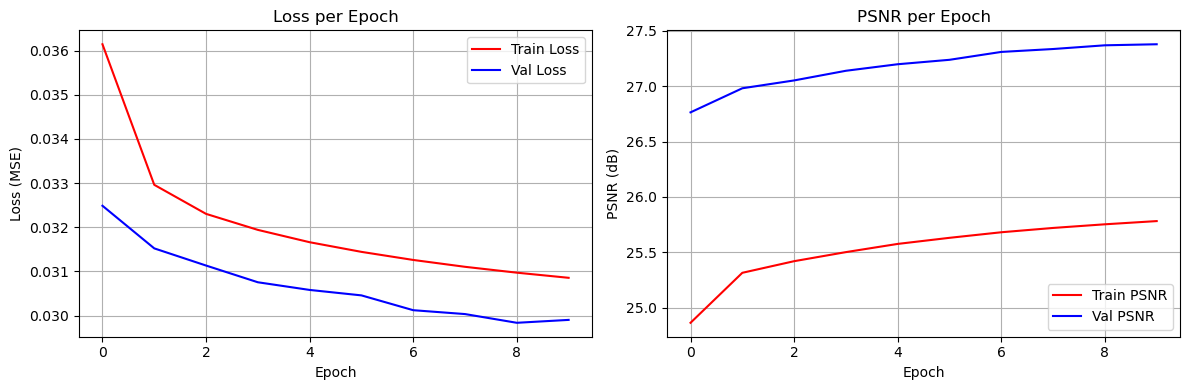

0

In [4]:
num_epochs = 10
train_model_sr(
    model=model,
    model_name="SRRESNET",
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=num_epochs,
    scale_factor=4,
    model_requires_upscale=False,
    best_model_path=best_model_path,
    last_model_path=last_model_path,
    mode="resume",
    history_path=history_path,
    use_amp=True  
)
